<font color="Blue" size="5"><b>Problem Statement:</b></font><br>

#### Indonesian-based telecommunications Client have customer retention issues as they are switching to other providers and that client contacted us to resolve the issue.

### 1.Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

### 2.Data Gathering

In [2]:
raw_df = pd.read_csv("Telicom-Call-Customer-Churn.csv")
raw_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 3.Exploratory Data Analysis

In [3]:
raw_df.shape     #Retriving shape of dataframe(raw_df)

(7043, 21)

In [4]:
raw_df.info()   #Retriving information of feature datatype, memory storage and more

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
raw_df.head(6)      #Retriving first 6 records of dataframe

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [6]:
#getting statical information of numerical feature

In [7]:
raw_df.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [8]:
#Getting unique values of features

In [9]:
for i in raw_df.columns:
    print(f"Unique count of {i} is= ",raw_df[i].nunique())
    print(f"Uniuqe values of {i} is= ",raw_df[i].unique(),"\n")

Unique count of customerID is=  7043
Uniuqe values of customerID is=  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

Unique count of gender is=  2
Uniuqe values of gender is=  ['Female' 'Male'] 

Unique count of SeniorCitizen is=  2
Uniuqe values of SeniorCitizen is=  ['No' 'Yes'] 

Unique count of Partner is=  2
Uniuqe values of Partner is=  ['Yes' 'No'] 

Unique count of Dependents is=  2
Uniuqe values of Dependents is=  ['No' 'Yes'] 

Unique count of tenure is=  73
Uniuqe values of tenure is=  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

Unique count of PhoneService is=  2
Uniuqe values of PhoneService is=  ['No' 'Yes'] 

Unique count of MultipleLines is=  3
Uniuqe values of MultipleLines is=  ['No phone service' 'No' 'Yes'] 

Unique count of InternetService is=  3


In [10]:
raw_df.columns  #Retriving feature name

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### Data visualisation

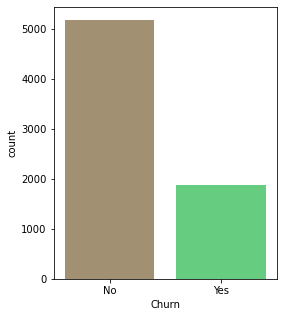

In [11]:
#checking frequency distribution of churn

plt.figure(figsize=(4,5))
sns.countplot(x=raw_df['Churn'],palette='terrain_r',linewidth=1)
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

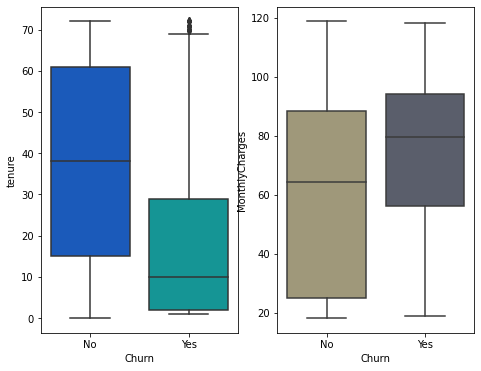

In [12]:
#checking frequency distribution of churn w.r.t. contract, monthly charges,Total charges

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.boxplot(x=raw_df["Churn"],y=raw_df["tenure"],data=raw_df,palette="winter")

plt.subplot(1,3,2)
sns.boxplot(x=raw_df["Churn"],y=raw_df["MonthlyCharges"],data=raw_df,palette="cividis_r")

# plt.subplot(1,3,2)
# sns.boxplot(x=raw_df["Churn"],y=raw_df["TotalCharges"],data=raw_df,palette="PuOr_r")

In [13]:
#checking relation between churn w.r.t. 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
# 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling','PaymentMethod'

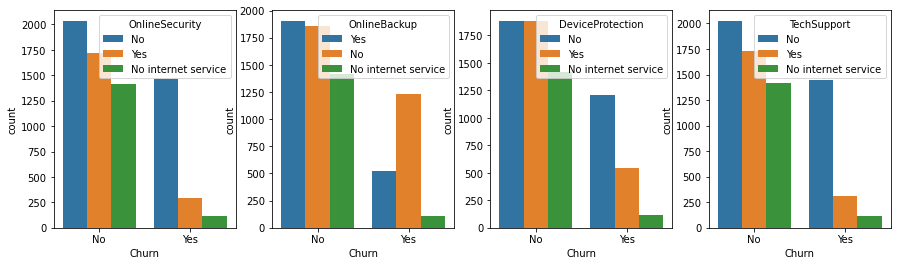

In [14]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.countplot(raw_df["Churn"],hue=raw_df['OnlineSecurity'],data=raw_df)

plt.subplot(1,4,2)
sns.countplot(raw_df["Churn"],hue=raw_df['OnlineBackup'],data=raw_df)

plt.subplot(1,4,3)
sns.countplot(raw_df["Churn"],hue=raw_df['DeviceProtection'],data=raw_df)

plt.subplot(1,4,4)
sns.countplot(raw_df["Churn"],hue=raw_df['TechSupport'],data=raw_df)

plt.show()

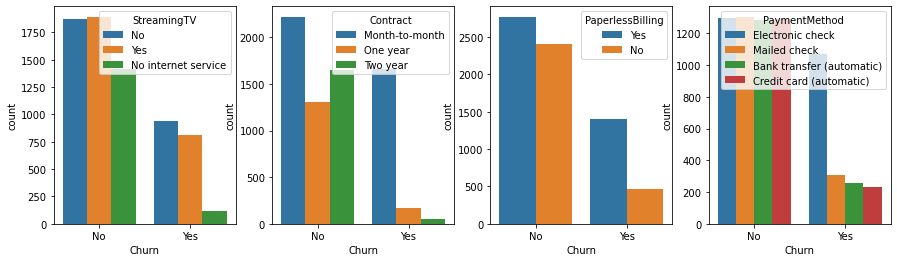

In [15]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.countplot(raw_df["Churn"],hue=raw_df['StreamingTV'],data=raw_df)

plt.subplot(1,4,2)
sns.countplot(raw_df["Churn"],hue=raw_df['Contract'],data=raw_df)

plt.subplot(1,4,3)
sns.countplot(raw_df["Churn"],hue=raw_df['PaperlessBilling'],data=raw_df)

plt.subplot(1,4,4)
sns.countplot(raw_df["Churn"],hue=raw_df['PaymentMethod'],data=raw_df)
plt.show()

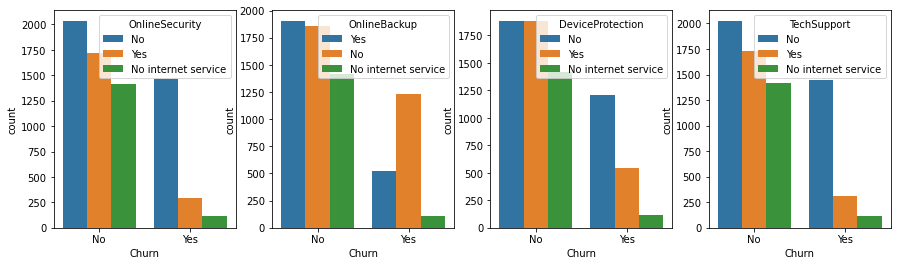

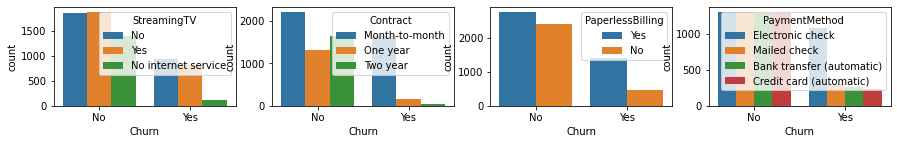

In [16]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.countplot(raw_df["Churn"],hue=raw_df['OnlineSecurity'],data=raw_df)

plt.subplot(1,4,2)
sns.countplot(raw_df["Churn"],hue=raw_df['OnlineBackup'],data=raw_df)

plt.subplot(1,4,3)
sns.countplot(raw_df["Churn"],hue=raw_df['DeviceProtection'],data=raw_df)

plt.subplot(1,4,4)
sns.countplot(raw_df["Churn"],hue=raw_df['TechSupport'],data=raw_df)

plt.show()

plt.figure(figsize=(15,4))
plt.subplot(2,4,1)
sns.countplot(raw_df["Churn"],hue=raw_df['StreamingTV'],data=raw_df)

plt.subplot(2,4,2)
sns.countplot(raw_df["Churn"],hue=raw_df['Contract'],data=raw_df)

plt.subplot(2,4,3)
sns.countplot(raw_df["Churn"],hue=raw_df['PaperlessBilling'],data=raw_df)

plt.subplot(2,4,4)
sns.countplot(raw_df["Churn"],hue=raw_df['PaymentMethod'],data=raw_df)
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

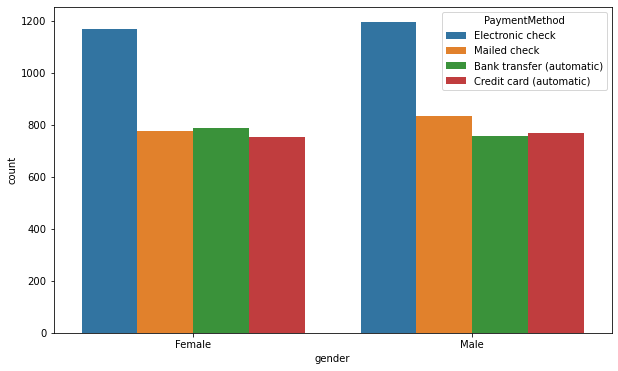

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(raw_df['gender'],hue=raw_df['PaymentMethod'],data=raw_df)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

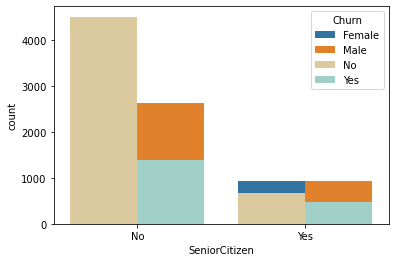

In [18]:
sns.countplot(raw_df['Churn'],hue=raw_df['gender'],data=raw_df)
sns.countplot(raw_df['SeniorCitizen'],hue=raw_df['Churn'],data=raw_df,palette="BrBG")

In [19]:
raw_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### 4.Data Preprocessing

In [20]:
raw_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
#total charge feature is in object datatype need to convert float or int

In [22]:
# df['TotalCharges'].apply(lambda x: int(x))
# new_total_charges = []
# for i in df.TotalCharges:
#     new_total_charges.append(float(i))

In [23]:
# " " observed so find index of space

In [24]:
np.where(raw_df["TotalCharges"]==" ")

(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],
       dtype=int64),)

In [25]:
raw_df.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                              No
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [26]:
#replacing empty " " with np.NaN

raw_df.replace({" ":np.NaN},inplace=True)

In [27]:
# getting count of nan values
raw_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
#datatype Conversion string to float
raw_df['TotalCharges']=raw_df['TotalCharges'].apply(lambda x: float(x))

In [30]:
raw_df['TotalCharges'].dtype

dtype('float64')

In [31]:
raw_df.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                              No
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [32]:
# dropping of ID feature
raw_df.drop('customerID',axis=1,inplace=True)

In [33]:
#Data Understanding for replacing NaN values
raw_df.groupby(['MonthlyCharges']).get_group((52.55))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No


In [34]:
#filling nan values with median

In [35]:
x_753 = raw_df.groupby(["MonthlyCharges",'Contract']).get_group((20.25,"Two year"))
# x_753_mean=x_753['TotalCharges'].dropna().mean()
med_753 = x_753['TotalCharges'].dropna().median()
raw_df.iloc[753,-2]= med_753

In [36]:
df = raw_df.copy()

In [37]:
df.iloc[936]

gender                    Female
SeniorCitizen                 No
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                 No
InternetService              DSL
OnlineSecurity               Yes
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                   No
StreamingTV                  Yes
StreamingMovies              Yes
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             80.85
TotalCharges                 NaN
Churn                         No
Name: 936, dtype: object

In [38]:
x_936 = df.groupby(['MonthlyCharges',"Contract"]).get_group((80.85,"Two year"))
med_936 = x_936['TotalCharges'].dropna().median()
df.iloc[936,-2] = med_936

In [39]:
df.iloc[1082]

gender                             Male
SeniorCitizen                        No
Partner                             Yes
Dependents                          Yes
tenure                                0
PhoneService                        Yes
MultipleLines                       Yes
InternetService                      No
OnlineSecurity      No internet service
OnlineBackup        No internet service
DeviceProtection    No internet service
TechSupport         No internet service
StreamingTV         No internet service
StreamingMovies     No internet service
Contract                       Two year
PaperlessBilling                     No
PaymentMethod              Mailed check
MonthlyCharges                    25.75
TotalCharges                        NaN
Churn                                No
Name: 1082, dtype: object

In [40]:
x_1082=df.groupby(['MonthlyCharges',"Contract"]).get_group((25.75,"Two year"))
med_1082 = x_1082['TotalCharges'].dropna().median()
df.iloc[1082,-2] = med_1082

In [41]:
df.iloc[1340]

gender                               Female
SeniorCitizen                            No
Partner                                 Yes
Dependents                              Yes
tenure                                    0
PhoneService                             No
MultipleLines              No phone service
InternetService                         DSL
OnlineSecurity                          Yes
OnlineBackup                            Yes
DeviceProtection                        Yes
TechSupport                             Yes
StreamingTV                             Yes
StreamingMovies                          No
Contract                           Two year
PaperlessBilling                         No
PaymentMethod       Credit card (automatic)
MonthlyCharges                        56.05
TotalCharges                            NaN
Churn                                    No
Name: 1340, dtype: object

In [42]:
x_1340 = df.groupby(['MonthlyCharges']).get_group((56.05))
med_1340 = x_1340['TotalCharges'].dropna().median()
df.iloc[1340,-2] = med_1340

In [43]:
x_3331 = df.groupby(['MonthlyCharges',"Contract"]).get_group((19.85,"Two year"))
med_3331 = x_3331['TotalCharges'].dropna().median()
df.iloc[3331,-2]=med_3331
x_3826 = df.groupby(['MonthlyCharges',"Contract"]).get_group((25.35,"Two year"))
med_3826 = x_3826['TotalCharges'].dropna().median()
df.iloc[3826,-2]=med_3826

In [44]:
x_4380 = df.groupby(['MonthlyCharges',"Contract"]).get_group((20.0,"Two year"))
med_4380 = x_4380['TotalCharges'].dropna().median()
df.iloc[4380,-2]=med_4380
x_5218 = df.groupby(['MonthlyCharges',"Contract"]).get_group((19.7,"One year"))
med_5218 = x_5218['TotalCharges'].dropna().median()
df.iloc[5218,-2]=med_5218
x_6670 = df.groupby(['MonthlyCharges',"Contract"]).get_group((73.35,"Two year"))
med_6670 = x_6670['TotalCharges'].dropna().median()
df.iloc[6670,-2]=med_6670
x_6754 = df.groupby(['MonthlyCharges']).get_group((61.9))
med_6754 = x_6754['MonthlyCharges'].dropna().median()
df.iloc[6754,-2] = med_6754

In [45]:
#after replacing nan checking count of NaN
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
Churn               0
dtype: int64

In [46]:
# Droped one nan record
df.dropna(inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7042 non-null   object 
 1   SeniorCitizen     7042 non-null   object 
 2   Partner           7042 non-null   object 
 3   Dependents        7042 non-null   object 
 4   tenure            7042 non-null   int64  
 5   PhoneService      7042 non-null   object 
 6   MultipleLines     7042 non-null   object 
 7   InternetService   7042 non-null   object 
 8   OnlineSecurity    7042 non-null   object 
 9   OnlineBackup      7042 non-null   object 
 10  DeviceProtection  7042 non-null   object 
 11  TechSupport       7042 non-null   object 
 12  StreamingTV       7042 non-null   object 
 13  StreamingMovies   7042 non-null   object 
 14  Contract          7042 non-null   object 
 15  PaperlessBilling  7042 non-null   object 
 16  PaymentMethod     7042 non-null   object 


<AxesSubplot:>

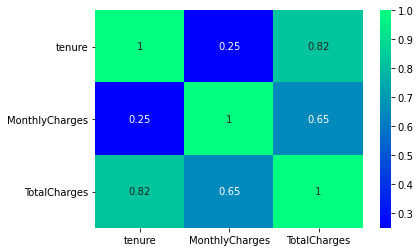

In [48]:
sns.heatmap(df.corr(),annot=True,cmap="winter")

##### Encoding of object  datatype features by using replace function

In [49]:
df['SeniorCitizen']=df['SeniorCitizen'].replace({"No":0,"Yes":1})
df['Partner']=df['Partner'].replace({"No":0,"Yes":1})
df['Dependents']=df['Dependents'].replace({"No":0,"Yes":1})
df['PhoneService']=df['PhoneService'].replace({"No":0,"Yes":1})

In [50]:
df.loc[(df['MultipleLines']=='No phone service') |(df['MultipleLines']=='No')]
df['MultipleLines']=df['MultipleLines'].replace({"No":0,"Yes":1, 'No phone service':2})

In [51]:
df.groupby(['InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']).get_group(('No','No internet service',
                                      'No internet service',
                                      'No internet service',
                                      'No internet service',
                                      'No internet service',
                                      'No internet service'))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,Male,0,0,0,16,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
16,Female,0,0,0,52,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,Male,0,1,0,12,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,Male,0,0,0,1,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,Male,0,0,0,1,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,Female,0,0,0,51,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,Female,0,0,0,39,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,No
7020,Male,0,1,1,12,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,No
7030,Female,0,0,0,2,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No


#### using Label encoder object to int

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["InternetService"] = df[["InternetService"]].apply(le.fit_transform)
df["OnlineSecurity"] = df[["OnlineSecurity"]].apply(le.fit_transform)
df["OnlineBackup"] = df[["OnlineBackup"]].apply(le.fit_transform)
df["DeviceProtection"] = df[["DeviceProtection"]].apply(le.fit_transform)
df["TechSupport"] = df[["TechSupport"]].apply(le.fit_transform)
df["StreamingTV"] = df[["StreamingTV"]].apply(le.fit_transform)
df["StreamingMovies"] = df[["StreamingMovies"]].apply(le.fit_transform)
df["Contract"] = df[["Contract"]].apply(le.fit_transform)
df["PaperlessBilling"] = df[['PaperlessBilling']].apply(le.fit_transform)
df['PaymentMethod'] = df[['PaymentMethod']].apply(le.fit_transform)

In [53]:
df.replace(['Female', 'Male'],[1,0],inplace=True)

#### getting unique values after encoding

In [54]:
for i in df.columns:
    print(f"Unique count of {i} is= ",df[i].nunique())
    print(f"Uniuqe values of {i} is= ",df[i].unique(),"\n")

Unique count of gender is=  2
Uniuqe values of gender is=  [1 0] 

Unique count of SeniorCitizen is=  2
Uniuqe values of SeniorCitizen is=  [0 1] 

Unique count of Partner is=  2
Uniuqe values of Partner is=  [1 0] 

Unique count of Dependents is=  2
Uniuqe values of Dependents is=  [0 1] 

Unique count of tenure is=  73
Uniuqe values of tenure is=  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39
  0] 

Unique count of PhoneService is=  2
Uniuqe values of PhoneService is=  [0 1] 

Unique count of MultipleLines is=  3
Uniuqe values of MultipleLines is=  [2 0 1] 

Unique count of InternetService is=  3
Uniuqe values of InternetService is=  [0 1 2] 

Unique count of OnlineSecurity is=  3
Uniuqe values of OnlineSecurity is=  [0 2 1] 

Unique count of OnlineBackup is=  3
Uniuqe values of OnlineBackup is=  [2 0 1] 

Unique 

## encoding Churn feature

In [55]:
df['Churn'] = df['Churn'].replace(['No', 'Yes'],[0,1])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7042 non-null   int64  
 1   SeniorCitizen     7042 non-null   int64  
 2   Partner           7042 non-null   int64  
 3   Dependents        7042 non-null   int64  
 4   tenure            7042 non-null   int64  
 5   PhoneService      7042 non-null   int64  
 6   MultipleLines     7042 non-null   int64  
 7   InternetService   7042 non-null   int32  
 8   OnlineSecurity    7042 non-null   int32  
 9   OnlineBackup      7042 non-null   int32  
 10  DeviceProtection  7042 non-null   int32  
 11  TechSupport       7042 non-null   int32  
 12  StreamingTV       7042 non-null   int32  
 13  StreamingMovies   7042 non-null   int32  
 14  Contract          7042 non-null   int32  
 15  PaperlessBilling  7042 non-null   int32  
 16  PaymentMethod     7042 non-null   int32  


In [57]:
df.isna().sum().sum()

0

In [58]:
# finding statistical relationship between all features for selecting the best model
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001937,0.001660,-0.010738,-0.004918,0.006931,0.000182,0.001033,0.014818,0.012206,-0.000728,0.006626,0.006258,0.008905,-0.000351,0.011636,-0.017145,0.014629,0.000707,0.008699
SeniorCitizen,0.001937,1.000000,0.016545,-0.211128,0.016487,0.008391,0.100048,-0.032388,-0.128153,-0.013698,-0.021323,-0.151203,0.030851,0.047201,-0.142483,0.156591,-0.038649,0.220154,0.102445,0.150858
Partner,0.001660,0.016545,1.000000,0.452561,0.379967,0.018168,0.090707,0.001065,0.150654,0.153305,0.166178,0.126555,0.137196,0.129760,0.294649,-0.015000,-0.154617,0.096916,0.318902,-0.150375
Dependents,-0.010738,-0.211128,0.452561,1.000000,0.160045,-0.001099,-0.017342,0.044859,0.151907,0.091260,0.080289,0.133261,0.046648,0.021570,0.242929,-0.111581,-0.039985,-0.113822,0.064171,-0.164122
tenure,-0.004918,0.016487,0.379967,0.160045,1.000000,0.007883,0.242780,-0.030587,0.325817,0.370757,0.371425,0.323288,0.289651,0.296719,0.672101,0.006309,-0.370815,0.247857,0.824751,-0.352394
PhoneService,0.006931,0.008391,0.018168,-0.001099,0.007883,1.000000,-0.690831,0.387218,-0.014600,0.023676,0.004271,-0.018567,0.055893,0.043416,0.002931,0.016877,-0.004827,0.247389,0.112955,0.011689
MultipleLines,0.000182,0.100048,0.090707,-0.017342,0.242780,-0.690831,1.000000,-0.340736,0.015025,0.068856,0.085571,0.020835,0.088819,0.101533,0.078180,0.108020,-0.124599,0.146323,0.251074,0.019610
InternetService,0.001033,-0.032388,0.001065,0.044859,-0.030587,0.387218,-0.340736,1.000000,-0.028186,0.035971,0.045163,-0.025818,0.107630,0.098180,0.100012,-0.138506,0.085914,-0.323364,-0.176280,-0.047398
OnlineSecurity,0.014818,-0.128153,0.150654,0.151907,0.325817,-0.014600,0.015025,-0.028186,1.000000,0.185371,0.175781,0.284829,0.044451,0.056191,0.374220,-0.157837,-0.096460,-0.053805,0.253994,-0.289237
OnlineBackup,0.012206,-0.013698,0.153305,0.091260,0.370757,0.023676,0.068856,0.035971,0.185371,1.000000,0.187974,0.195994,0.147378,0.136580,0.281280,-0.013251,-0.125092,0.119728,0.375424,-0.195633


### Feature Selection

<AxesSubplot:>

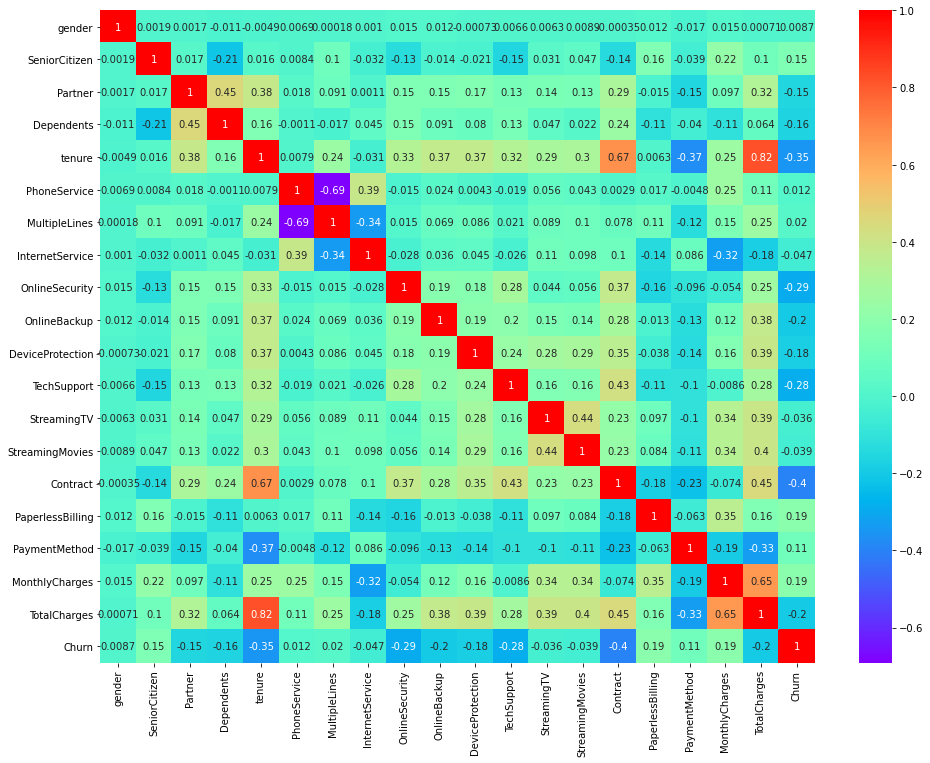

In [59]:
#1.Pearson
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,cmap="rainbow")

<AxesSubplot:>

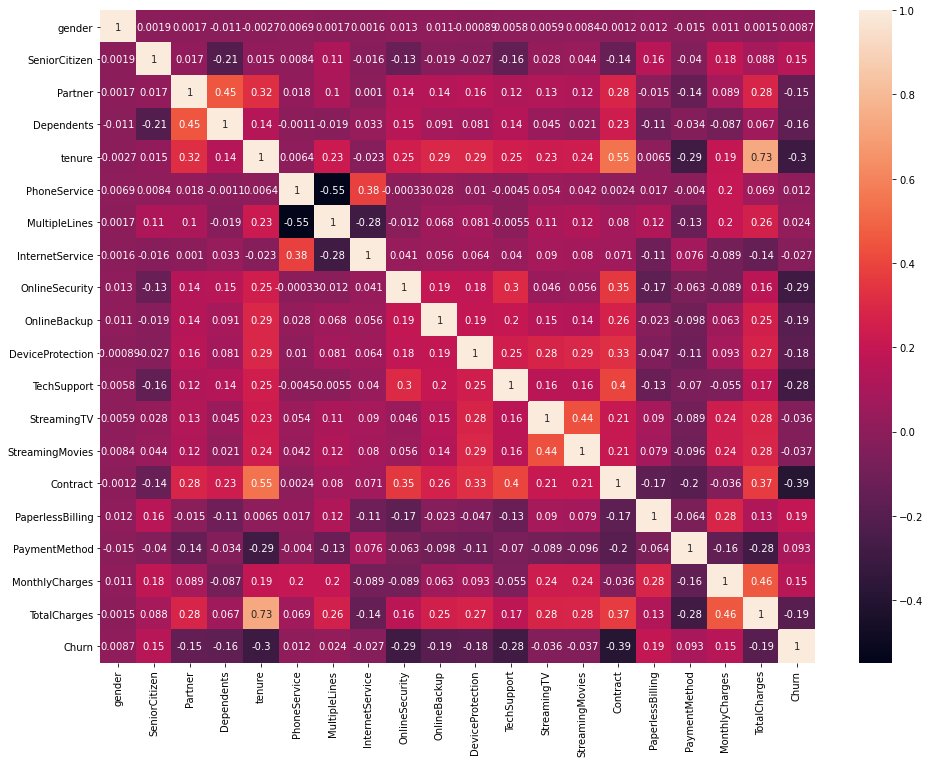

In [60]:
#2.Kendall
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(method="kendall"),annot=True)

<AxesSubplot:>

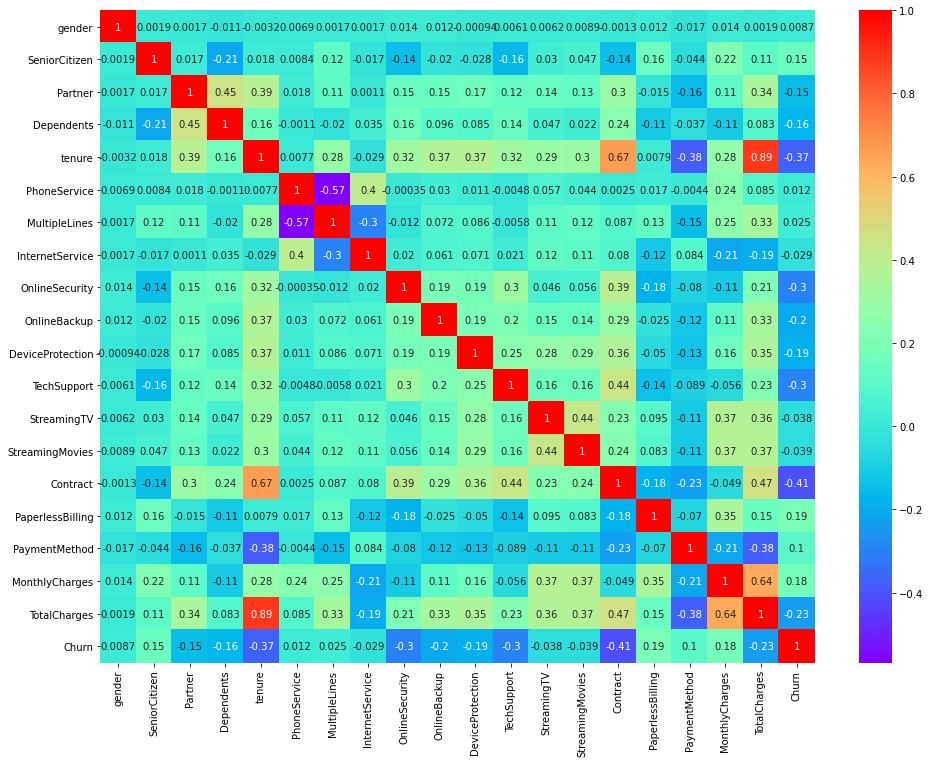

In [61]:
# 3.Spearman
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(method="spearman"),annot=True,cmap="rainbow")

##### defining x and y for feature selection

In [62]:
x = df.drop("Churn",axis=1)
y = df["Churn"]

In [63]:
# chi2 test
from sklearn.feature_selection import SelectKBest,chi2
best_features = SelectKBest(score_func=chi2, k=18)
best_features.fit(x,y)
df_chi2 = pd.DataFrame({"Feature":x.columns,"Chi_Square":best_features.scores_})
df_chi2.sort_values("Chi_Square",ascending=False)

,Feature,Chi_Square
18,TotalCharges,628596.414356
4,tenure,16287.847125
17,MonthlyCharges,3679.559205
14,Contract,1115.383781
8,OnlineSecurity,551.301780
11,TechSupport,523.001338
9,OnlineBackup,230.272560
10,DeviceProtection,191.117635
1,SeniorCitizen,134.272512
3,Dependents,132.876018


In [64]:
chi2_score,p_value = chi2(x,y)
df_chi3 = pd.DataFrame({'Feature':x.columns, "Chi_square":chi2_score,'P_value':np.around(p_value,5)})
df_chi3.sort_values("P_value")

,Feature,Chi_square,P_value
9,OnlineBackup,230.272560,0.00000
16,PaymentMethod,58.349571,0.00000
15,PaperlessBilling,105.774680,0.00000
14,Contract,1115.383781,0.00000
11,TechSupport,523.001338,0.00000
10,DeviceProtection,191.117635,0.00000
17,MonthlyCharges,3679.559205,0.00000
8,OnlineSecurity,551.301780,0.00000
18,TotalCharges,628596.414356,0.00000
4,tenure,16287.847125,0.00000


#### Information Gain Test

<AxesSubplot:>

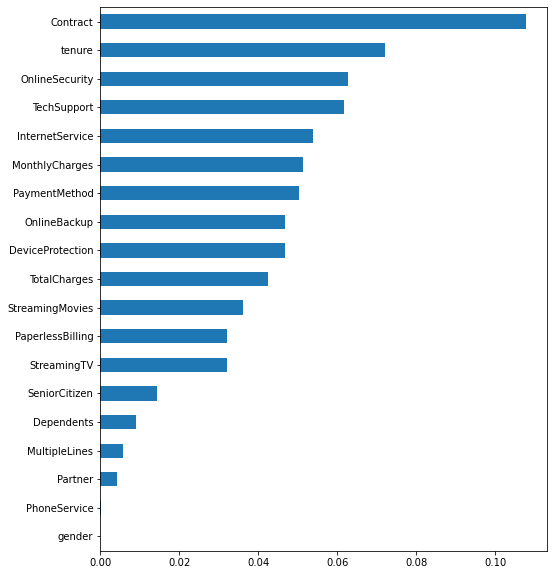

In [65]:
plt.figure(figsize=(8,10))
from sklearn.feature_selection import mutual_info_classif
array = mutual_info_classif(x,y)
s1 = pd.Series(array,index=x.columns)
s1.sort_values(ascending=True).plot(kind="barh")

##### Annova Test

In [66]:
from sklearn.feature_selection import f_classif
f_val , p_val = f_classif(x,y)
df_anova = pd.DataFrame({'Feature': x.columns, 'F_Val': f_val, 'P_Val':np.around(p_val,5)})
df_anova

,Feature,F_Val,P_Val
0,gender,0.532789,0.46546
1,SeniorCitizen,163.947826,0.00000
2,Partner,162.875014,0.00000
3,Dependents,194.879793,0.00000
4,tenure,998.193400,0.00000
5,PhoneService,0.962086,0.32670
6,MultipleLines,2.708232,0.09988
7,InternetService,15.851670,0.00007
8,OnlineSecurity,642.721325,0.00000
9,OnlineBackup,280.158122,0.00000


### Final Feature selection

In [67]:
x = df.drop('Churn',axis = 1)
y = df["Churn"]

### Feature scaling

In [68]:
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()
x_scallled = std_scalar.fit_transform(x)
df_x = pd.DataFrame(x_scallled,columns=x.columns)

#### Final Model Building

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [70]:
X= df_x
Y = y

In [71]:
# splitting data
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.15,random_state=1)

In [72]:
svm_svc_model = SVC()
svm_svc_model.fit(X_train,Y_train)
svm_svc_model.score(X_test,Y_test),svm_svc_model.score(X_train,Y_train)

(0.738883632923368, 0.7338345864661654)

### with Normal Scalling

In [73]:
from sklearn.preprocessing import MinMaxScaler

mm_scalar = MinMaxScaler()
mm_scalled = mm_scalar.fit_transform(x)
df_X = pd.DataFrame(mm_scalled,columns=x.columns)

In [74]:
X1=df_X
Y1=df["Churn"]


X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.15,random_state=1)

new_svm_clf1 = SVC()
new_svm_clf1.fit(X1_train,Y1_train)
new_svm_clf1.score(X1_test,Y1_test),new_svm_clf1.score(X1_train,Y1_train)

(0.8183538315988647, 0.8173767752715121)

##### smooting

In [75]:
from imblearn.over_sampling import SMOTE
over_sample=SMOTE()

X2,Y2=over_sample.fit_resample(X1,Y1)

# model making
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.2,random_state=3)

new_svm_clf2 = SVC()
new_svm_clf2.fit(X2_train,Y2_train)
new_svm_clf2.score(X2_test,Y2_test),new_svm_clf2.score(X2_train,Y2_train)

(0.8140096618357487, 0.8235862735621073)

#### hyperparameter tuning after smooting and accuracy score

In [76]:
final_svm_model = SVC()
final_svm_model.fit(X2,Y2)
final_svm_model.score(X2_test,Y2_test)

0.8381642512077294

In [77]:
import pickle
with open("SVM_SVC_model.pickle","wb") as file:
    pickle.dump(final_svm_model,file)